# Pt 1

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = load_breast_cancer()

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data.data.shape

(569, 30)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
data.target.shape

(569,)

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=.33)
N, D = X_train.shape

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 12ms/step - loss: 0.7630 - accuracy: 0.5066 - val_loss: 0.7629 - val_accuracy: 0.5160
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5827 - val_loss: 0.6832 - val_accuracy: 0.5957
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.6719 - val_loss: 0.6145 - val_accuracy: 0.6436
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5663 - accuracy: 0.7218 - val_loss: 0.5555 - val_accuracy: 0.7128
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7638 - val_loss: 0.5061 - val_accuracy: 0.7819
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.8163 - val_loss: 0.4635 - val_accuracy: 0.8191
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.8241 - val_loss: 0.4269 - val_accuracy: 0.8511
Epoch 8/100


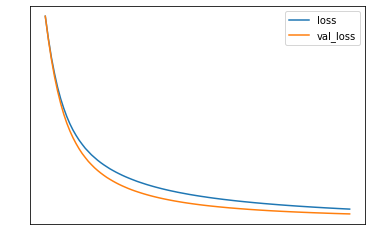

In [14]:
COLOR = 'white'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

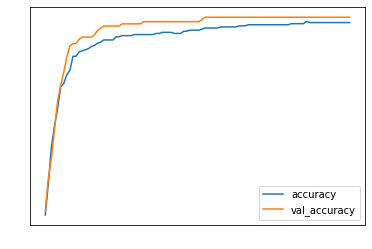

In [15]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

# Pt 2 Making Predictions

In [16]:
P = model.predict(X_test)
P

array([[8.84754419e-01],
       [2.46229768e-03],
       [9.99541879e-01],
       [9.99111533e-01],
       [6.27905130e-04],
       [9.83754754e-01],
       [9.99754786e-01],
       [9.98121440e-01],
       [5.48934639e-02],
       [1.12755035e-04],
       [9.99885798e-01],
       [9.87465024e-01],
       [9.93308425e-01],
       [9.98439491e-01],
       [9.99250531e-01],
       [1.62244106e-07],
       [9.97165799e-01],
       [1.71151757e-03],
       [1.91464223e-05],
       [6.91601417e-06],
       [3.07881832e-03],
       [1.47536912e-06],
       [9.90222931e-01],
       [9.83751893e-01],
       [9.98477578e-01],
       [4.04654741e-01],
       [3.24487686e-04],
       [5.86648405e-01],
       [4.87994254e-02],
       [9.53081965e-01],
       [9.99259949e-01],
       [9.25949693e-01],
       [9.99277830e-01],
       [9.90416050e-01],
       [9.72848356e-01],
       [4.70206141e-03],
       [9.83411193e-01],
       [9.92507637e-01],
       [9.51757312e-01],
       [2.45458186e-02],


In [17]:
P = np.round(P).flatten()
P

array([1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1.], dtype=float32)

In [18]:
print('Manually calculated accurary:', np.mean(P == y_test))
print('Evauate ouptup:', model.evaluate(X_test, y_test))

Manually calculated accurary: 0.9840425531914894
6/6 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9840
Evauate ouptup: [0.0843842476606369, 0.9840425252914429]


# Pt 3: Saving and Loading a Model

In [19]:
model.save('linearclassifier.h5')

In [20]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Oct 27 18:15 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Oct 14 16:31 sample_data


In [21]:
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9840


[0.0843842476606369, 0.9840425252914429]